In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
import scipy 
from scipy import stats 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
def optimal_number_of_clusters(data):
        # FUNCTIONS
        cost = []
        for n in range(1, 20):
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(X=data)
            cost.append(kmeans.inertia_)
        x1, y1 = 2, cost[0]
        x2, y2 = 20, cost[len(cost)-1]
        distances = []
        for i in range(len(cost)):
            x0 = i+2
            y0 = cost[i]
            numerator = np.abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
            denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
            distances.append(numerator/denominator)
        n_clusters = distances.index(max(distances)) + 2
        plt.plot(range(1, 20), cost, "--o")
        plt.plot(n_clusters, cost[n_clusters-1], "o", color="red")
        plt.xlabel("Number of Clusters")
        plt.ylabel("Squared Error")
        plt.show()
        return n_clusters
import pickle
from sklearn.cluster import KMeans

1. DATA READ IN

In [49]:
df = pd.read_csv("Marketing.txt")
df
df = df.fillna(-99999)
df.info()
#  1    ANNUAL INCOME OF HOUSEHOLD (PERSONAL INCOME IF SINGLE)
#              1. Less than $10,000
#              2. $10,000 to $14,999
#              3. $15,000 to $19,999
#              4. $20,000 to $24,999
#              5. $25,000 to $29,999
#              6. $30,000 to $39,999
#              7. $40,000 to $49,999
#              8. $50,000 to $74,999
#              9. $75,000 or more


#  2    SEX
#              1. Male
#              2. Female
 
#  3    MARITAL STATUS
#              1. Married
#              2. Living together, not married
#              3. Divorced or separated
#              4. Widowed
#              5. Single, never married
 
#  4    AGE
#              1. 14 thru 17
#              2. 18 thru 24
#              3. 25 thru 34
#              4. 35 thru 44
#              5. 45 thru 54
#              6. 55 thru 64
#              7. 65 and Over
 
#  5    EDUCATION
#              1. Grade 8 or less
#              2. Grades 9 to 11
#              3. Graduated high school
#              4. 1 to 3 years of college
#              5. College graduate
#              6. Grad Study
 
#  6    OCCUPATION
#              1. Professional/Managerial
#              2. Sales Worker
#              3. Factory Worker/Laborer/Driver
#              4. Clerical/Service Worker
#              5. Homemaker
#              6. Student, HS or College
#              7. Military
#              8. Retired
#              9. Unemployed
 
 
 
#  7    HOW LONG HAVE YOU LIVED IN THE SAN FRAN./OAKLAND/SAN JOSE AREA?
#              1. Less than one year
#              2. One to three years
#              3. Four to six years
#              4. Seven to ten years
#              5. More than ten years
 
#  8    DUAL INCOMES (IF MARRIED)
#              1. Not Married
#              2. Yes
#              3. No
 
#  9    PERSONS IN YOUR HOUSEHOLD
#              1. One
#              2. Two
#              3. Three
#              4. Four
#              5. Five
#              6. Six
#              7. Seven
#              8. Eight
#              9. Nine or more
 
#  10    PERSONS IN HOUSEHOLD UNDER 18
#              0. None
#              1. One
#              2. Two
#              3. Three
#              4. Four
#              5. Five
#              6. Six
#              7. Seven
#              8. Eight
#              9. Nine or more
 
#  11    HOUSEHOLDER STATUS
#              1. Own
#              2. Rent
#              3. Live with Parents/Family
 
#  12    TYPE OF HOME
#              1. House
#              2. Condominium
#              3. Apartment
#              4. Mobile Home
#              5. Other
 
#  13    ETHNIC CLASSIFICATION
#              1. American Indian
#              2. Asian
#              3. Black
#              4. East Indian
#              5. Hispanic
#              6. Pacific Islander
#              7. White
#              8. Other
 
#  14    WHAT LANGUAGE IS SPOKEN MOST OFTEN IN YOUR HOME?
#              1. English
#              2. Spanish
#              3. Other

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8993 entries, 0 to 8992
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AnnualIncome                8993 non-null   int64  
 1   Sex                         8993 non-null   int64  
 2   MaritalStatus               8993 non-null   float64
 3   Age                         8993 non-null   int64  
 4   Education                   8993 non-null   float64
 5   Occupation                  8993 non-null   float64
 6   TimeInTheArea               8993 non-null   float64
 7   DualIncomeFlag              8993 non-null   int64  
 8   NumPersonsInHousehold       8993 non-null   float64
 9   NumberPersonsHouseholdLT18  8993 non-null   int64  
 10  HouseholderStatus           8993 non-null   float64
 11  TypeOfHome                  8993 non-null   float64
 12  EthnicClassifcation         8993 non-null   float64
 13  Language                    8993 

2. DATA QUALITY CHECK

Checking duplicates
719

Re-Checking duplicates
0

Univariate Analysis
AnnualIncome
Sex
MaritalStatus
Age
Education
Occupation
TimeInTheArea
DualIncomeFlag
NumPersonsInHousehold
NumberPersonsHouseholdLT18
HouseholderStatus
TypeOfHome
EthnicClassifcation
Language
TrainTestFlag


,Feature,Feature Type,# Records,# Zero's,% Zero's,# Missing,% Missing,Minimum,Mean,Median,Maximum,Skewness,Kurtosis,Normality (p > 0.05)
0,AnnualIncome,int64,8574.0,0.0,0.00,0.0,0.0,1.0,4.90,5.0,9.0,-0.09,-1.37,0.0
0,Sex,int64,8574.0,0.0,0.00,0.0,0.0,1.0,1.54,2.0,2.0,-0.18,-1.97,0.0
0,MaritalStatus,float64,8574.0,0.0,0.00,0.0,0.0,-99999.0,-1863.12,3.0,5.0,-7.12,48.64,0.0
0,Age,int64,8574.0,0.0,0.00,0.0,0.0,1.0,3.43,3.0,7.0,0.58,-0.41,0.0
0,Education,float64,8574.0,0.0,0.00,0.0,0.0,-99999.0,-999.21,4.0,6.0,-9.84,94.76,0.0
0,Occupation,float64,8574.0,0.0,0.00,0.0,0.0,-99999.0,-1582.48,3.0,9.0,-7.75,58.09,0.0
0,TimeInTheArea,float64,8574.0,0.0,0.00,0.0,0.0,-99999.0,-10481.35,5.0,5.0,-2.58,4.66,0.0
0,DualIncomeFlag,int64,8574.0,0.0,0.00,0.0,0.0,1.0,1.54,1.0,3.0,0.97,-0.52,0.0
0,NumPersonsInHousehold,float64,8574.0,0.0,0.00,0.0,0.0,-99999.0,-4335.93,2.0,9.0,-4.48,18.10,0.0
0,NumberPersonsHouseholdLT18,int64,8574.0,5510.0,4.28,0.0,0.0,0.0,0.66,0.0,9.0,2.06,5.50,0.0




Train Sample - Correlation Analysis


,AnnualIncome,Sex,MaritalStatus,Age,Education,Occupation,TimeInTheArea,DualIncomeFlag,NumPersonsInHousehold,NumberPersonsHouseholdLT18,HouseholderStatus,TypeOfHome,EthnicClassifcation,Language
AnnualIncome,1.000000,-0.016490,0.066912,0.350673,0.020725,0.038856,0.045252,0.354144,0.102617,-0.056427,0.079926,0.067054,0.006132,0.001054
Sex,-0.016490,1.000000,0.026452,0.042585,0.002852,0.008297,-0.015338,0.088121,0.026669,0.068878,0.063092,0.036575,0.016108,0.019821
MaritalStatus,0.066912,0.026452,1.000000,0.047956,0.000511,0.019410,0.043963,-0.060550,0.031681,-0.019931,0.077696,0.047899,0.024864,0.054458
Age,0.350673,0.042585,0.047956,1.000000,0.015720,0.028266,-0.006449,0.383904,0.013665,-0.233573,0.002271,0.013651,0.012024,-0.011352
Education,0.020725,0.002852,0.000511,0.015720,1.000000,0.090788,0.020395,0.009005,0.020112,-0.034154,0.024058,0.025448,-0.009292,0.070047
Occupation,0.038856,0.008297,0.019410,0.028266,0.090788,1.000000,0.047084,0.028808,0.023836,-0.003128,-0.021798,0.011492,0.009223,0.010362
TimeInTheArea,0.045252,-0.015338,0.043963,-0.006449,0.020395,0.047084,1.000000,-0.040867,0.070855,-0.014112,0.043377,0.026757,0.003224,0.008505
DualIncomeFlag,0.354144,0.088121,-0.060550,0.383904,0.009005,0.028808,-0.040867,1.000000,0.077322,0.100868,0.034095,0.016659,-0.002690,0.000875
NumPersonsInHousehold,0.102617,0.026669,0.031681,0.013665,0.020112,0.023836,0.070855,0.077322,1.000000,0.114076,0.179068,0.166322,0.044974,0.070170
NumberPersonsHouseholdLT18,-0.056427,0.068878,-0.019931,-0.233573,-0.034154,-0.003128,-0.014112,0.100868,0.114076,1.000000,0.043561,0.018105,-0.002343,0.012349


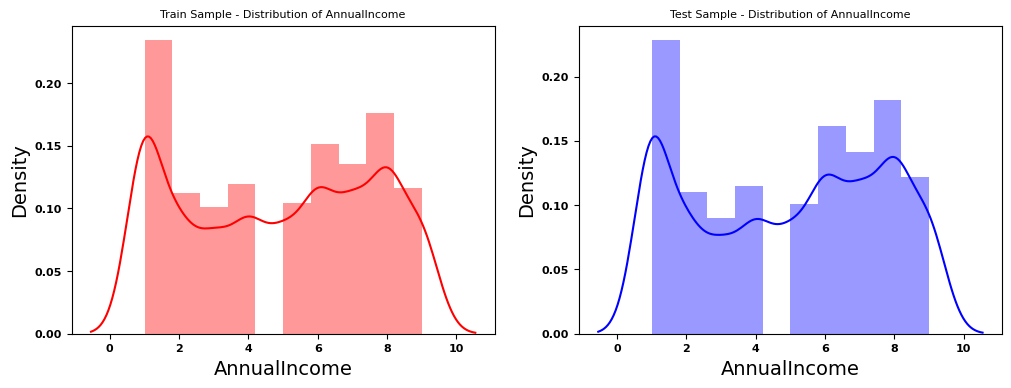

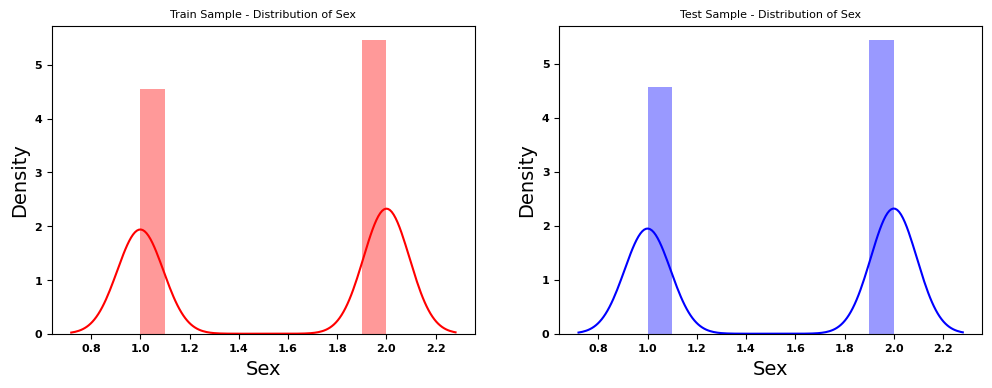

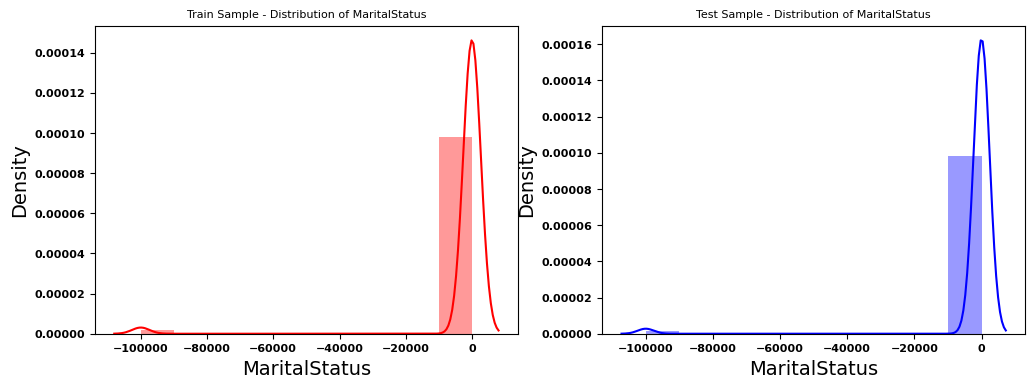

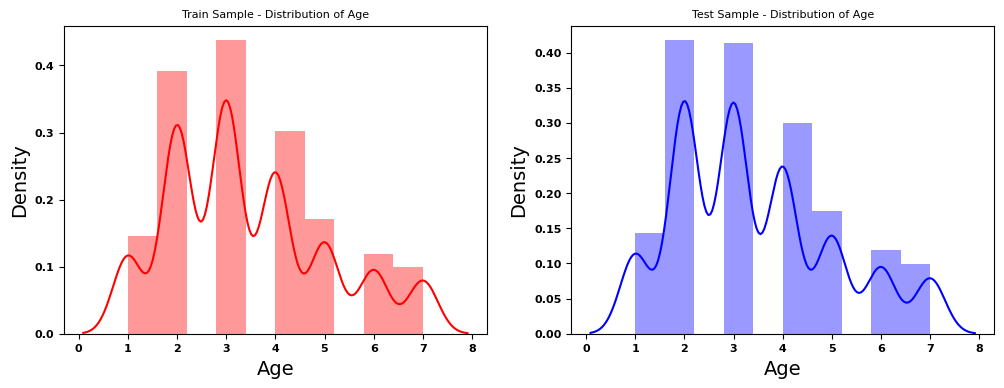

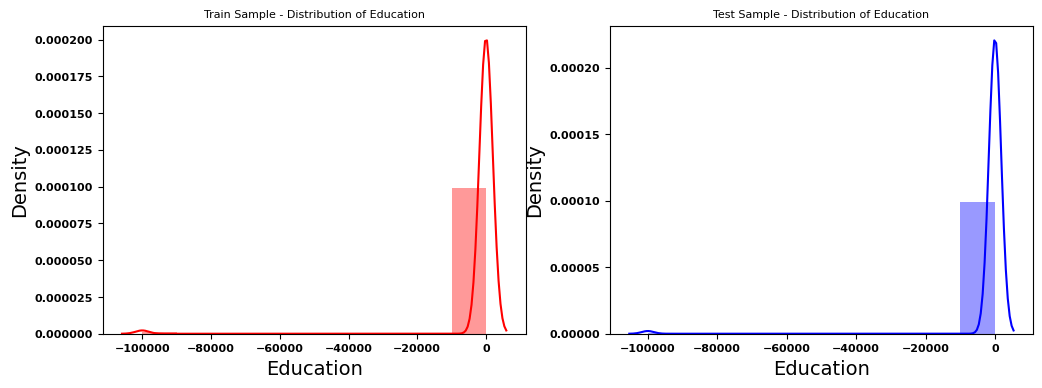

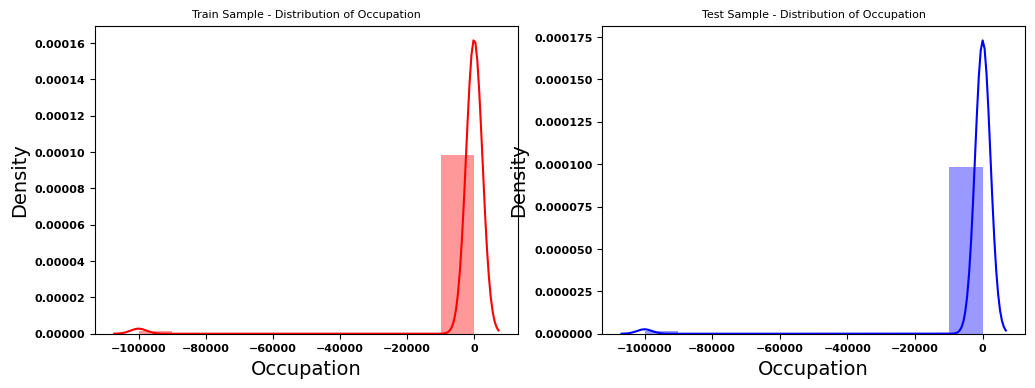

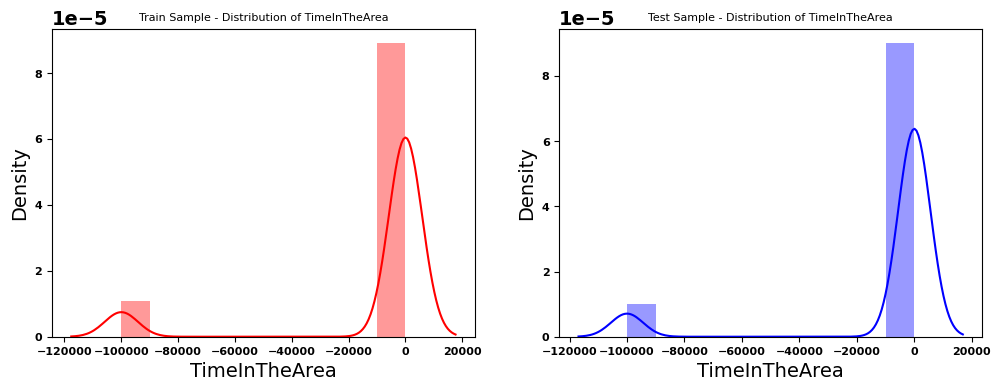

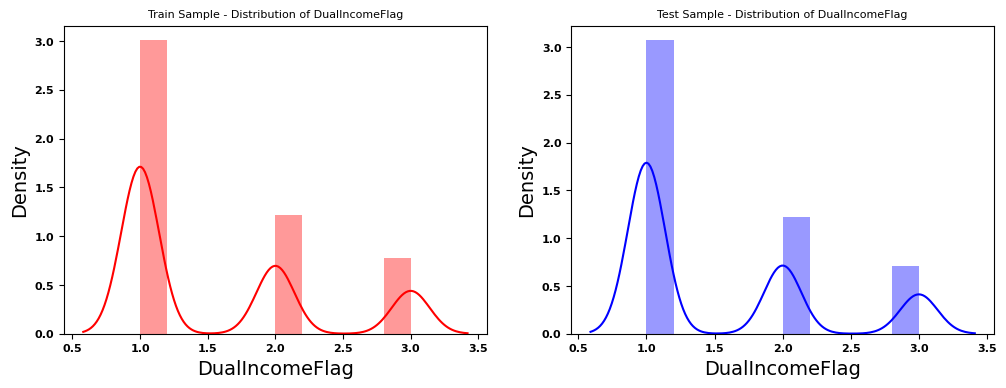

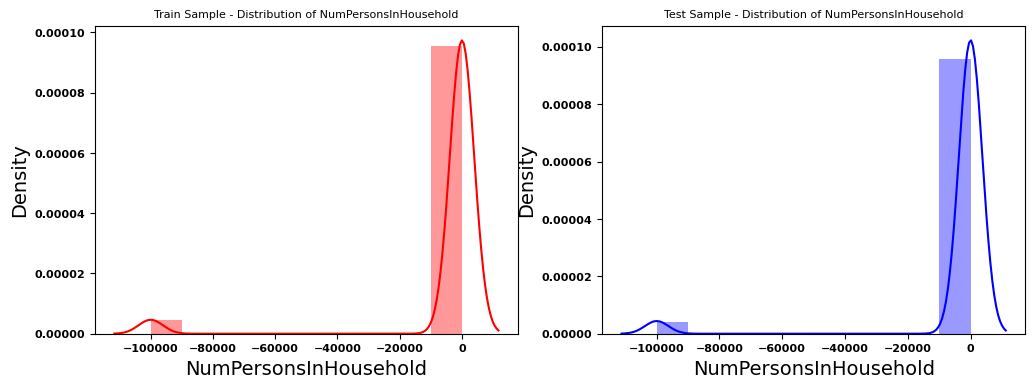

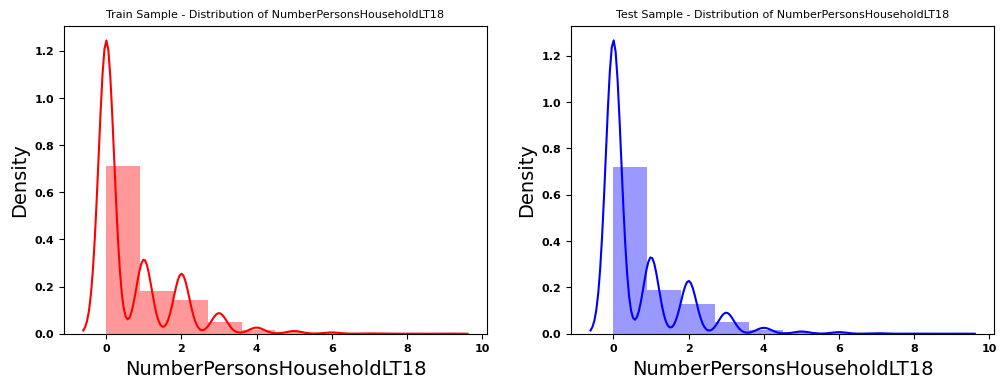

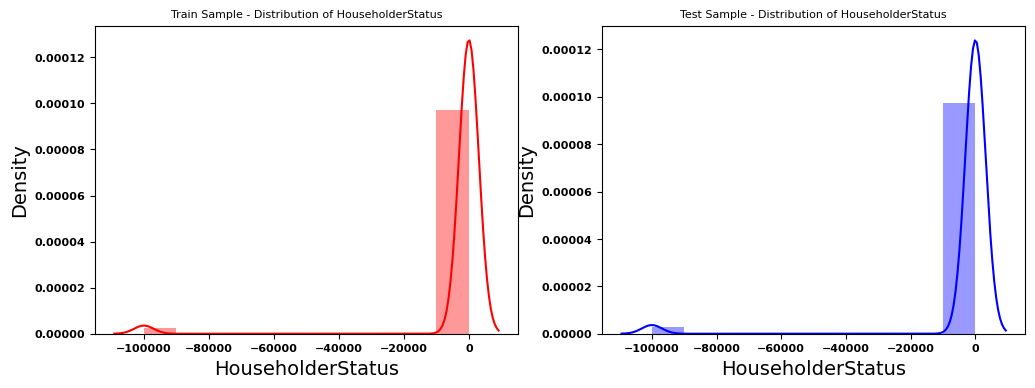

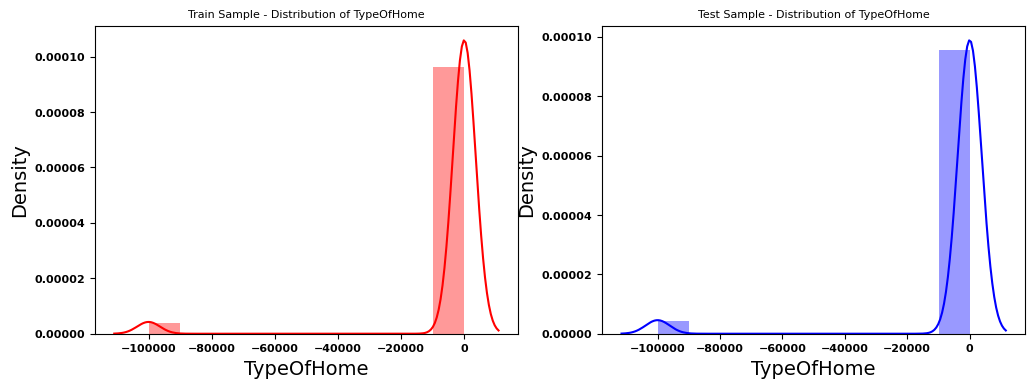

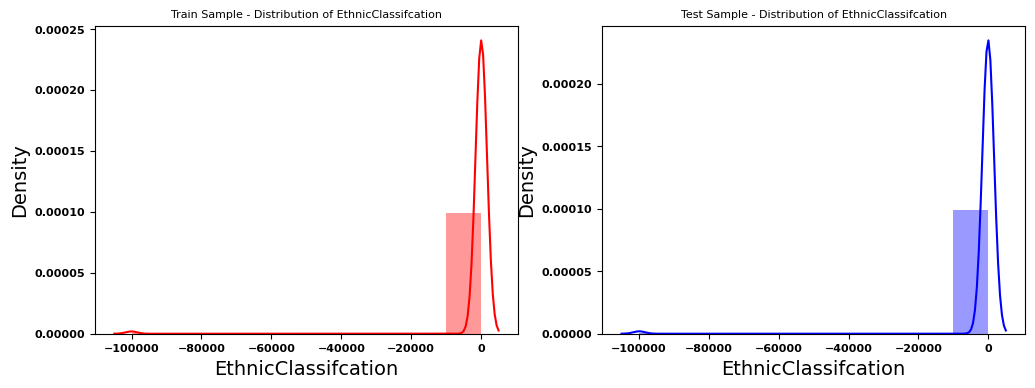

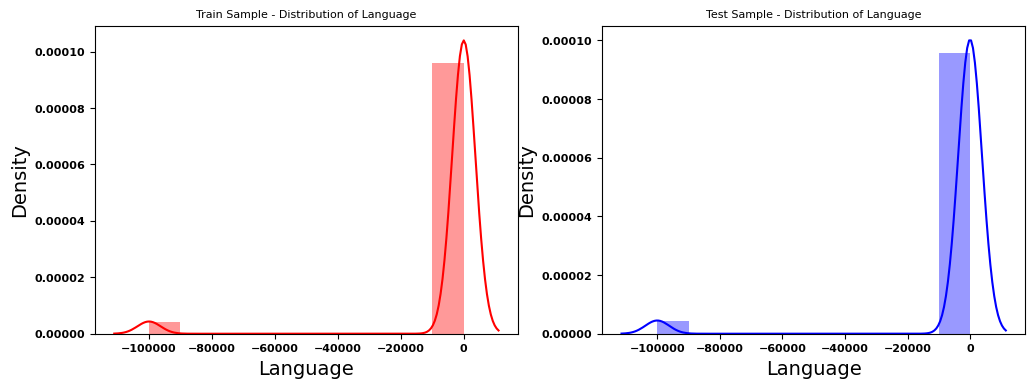

In [50]:
df['TrainTestFlag'] = 0
df.iloc[pd.Series(df.index).sample(frac=0.5, random_state=1234), df.columns.get_loc('TrainTestFlag')] = 1

# Check for exact duplicates
print("Checking duplicates")
print(df.duplicated(keep=False).sum())
print("")

df = df.drop_duplicates()
print("Re-Checking duplicates")
print(df.duplicated(keep=False).sum())
print("")


# Univariate Analysis
print("Univariate Analysis")
chars = df.columns

d = pd.DataFrame(index = [0],columns=['Feature','Feature Type','# Records',"# Zero's","% Zero's","# Missing","% Missing","Minimum", "Mean", "Median", "Maximum", "Skewness","Kurtosis","Normality (p > 0.05)"])
d.to_csv('univariateAnalysis.csv')      

notApplicable = "N/A"
for z in range(len(chars)):
    a = pd.read_csv('univariateAnalysis.csv',index_col=0)  
    if(df[chars[z]].dtype !='object'):
        print(chars[z])
        k2, p = stats.normaltest(df[chars[z]])
        dd = pd.DataFrame({'Feature':[chars[z]],
                            'Feature Type':df[chars[z]].dtype,
                            "# Records":len(df),
                            "# Zero's": (df[chars[z]] == 0).sum(),
                            "% Zero's" : round((df[chars[z]] == 0).sum()/df.size*100,2),
                            "# Missing" : (df[chars[z]].isna()).sum(),
                            "% Missing" : round((df[chars[z]].isna()).sum()/df.size*100,2),
                            "Minimum" : round(df[chars[z]].min(),2),
                            "Mean" : round(df[chars[z]].mean(),2),
                            "Median" : round(df[chars[z]].median(),2),
                            "Maximum" : round(df[chars[z]].max(),2),
                            "Skewness" : round(df[chars[z]].skew(),2), #Positive Skewness -> LEFT SKEW -> -> Threshold is -0.5 < x < 0.5
                            "Kurtosis" : round(df[chars[z]].kurt(),2), #Negative Kurtosis -> FAT TAILS -> -> Threshold is 3
                            "Normality (p > 0.05)" : round(p,3)}
                            )
        s = pd.concat([a, dd])
        s = s.dropna()
        s.to_csv('univariateAnalysis.csv')

    else:
        dd = pd.DataFrame({'Feature':[chars[z]],
                    'Feature Type':df[chars[z]].dtype,
                    "# Records": len(df),
                    "# Zero's": (df[chars[z]] == 0).sum(),
                    "% Zero's" : round((df[chars[z]] == 0).sum()/len(df)*100,1),
                    "# Missing" : (df[chars[z]].isna()).sum(),
                    "% Missing" : round((df[chars[z]].isna()).sum()/df.size*100,1),
                    "Minimum" : [notApplicable],
                    "Mean" : [notApplicable],
                    "Median" : [notApplicable],
                    "Maximum" : [notApplicable],
                    "Skewness" : [notApplicable],
                    "Kurtosis" : [notApplicable],
                    "Normality (p > 0.05)" : [notApplicable]}
                    )

        s = pd.concat([a, dd])
        s = s.dropna()
        s.to_csv('univariateAnalysis.csv')
display(s)
print("")


#Split Train vs Test -> 50% vs 50%
train = df.loc[df['TrainTestFlag'] == 1]
test = df.loc[df['TrainTestFlag'] == 0]

chars = list(df.columns)
chars.remove("TrainTestFlag")

for z in range(len(chars)):

    f= plt.figure(figsize=(12,4))
    ax=f.add_subplot(121)
    ax.tick_params(axis='both', which='major', labelsize=8)
    sns.distplot(train[chars[z]],bins=10,color='r',ax=ax)
    ax.set_title('Train Sample - Distribution of '+chars[z], fontsize = 8)

    ax=f.add_subplot(122)
    ax.tick_params(axis='both', which='major', labelsize=8)
    sns.distplot(test[chars[z]],bins=10,color='b',ax=ax)
    ax.set_title('Test Sample - Distribution of '+chars[z], fontsize = 8)

# Correlation
print("")
print("Train Sample - Correlation Analysis")
ds = train.drop(columns=['TrainTestFlag'], axis=1)
corr = ds.corr()
#display(corr)
display(corr.style.background_gradient(cmap='coolwarm'))
print("")



3. PREPARE DATA

In [51]:
print("Standardize Features")

from sklearn.preprocessing import StandardScaler
sc = StandardScaler().set_output(transform="pandas")

# Fit only on Train sample
train_transformed = sc.fit_transform(train[chars])

# Transform Test sample
test_transformed = sc.transform(test[chars])
print("")

Standardize Features



4. PRINCIPAL COMPONENT ANALYIS (PCA)

Explained variance ratio
[0.12906608 0.10603279 0.08487465 0.07830014 0.07399402 0.07144372
 0.06979431 0.06739422 0.06562415 0.0619522  0.05668142 0.05528178
 0.04438152 0.035179  ]


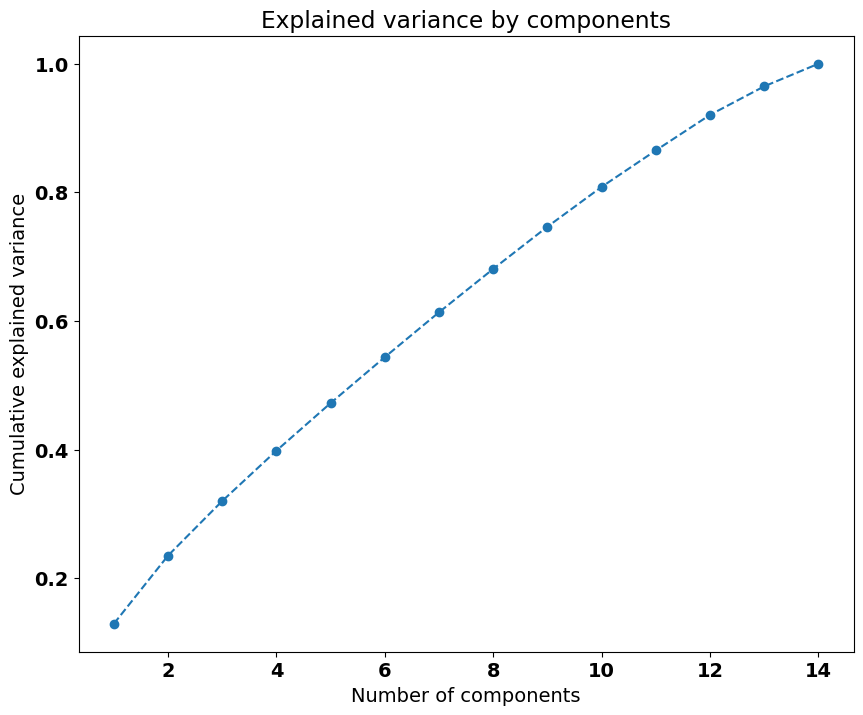

Perform PCA with n components
Generate scores
             0         1         2         3         4         5         6  \
0    -2.335105  1.722411  1.083803  0.750451  1.899685 -0.555664 -2.716254   
1    -2.301285  0.202719  0.718483 -0.482437  0.920527  0.450631  0.499018   
2    -1.241231 -0.407192  0.406626 -0.369645  0.028061 -0.549579 -0.085422   
3    -2.564686  0.900538 -0.452774  0.098509  0.548467  0.647375  0.382821   
4     1.549076 -0.951703 -0.531508 -0.137053  0.504387  0.480460  0.182780   
...        ...       ...       ...       ...       ...       ...       ...   
4267  1.481417 -0.678822 -1.083807  0.123229  0.375855  0.587734  0.145644   
4268  0.879845 -0.840596 -0.520073 -0.047385 -0.393974 -0.495171 -0.330562   
4269  0.961602 -0.435472 -1.160714  0.198484  0.383351  0.577159  0.167689   
4270  1.730854 -1.675581  0.666741 -0.649870 -0.205999 -0.702509 -0.309794   
4271  0.178264 -0.252371 -1.181292  0.227595  0.629094  0.590998  0.295098   

             7   

,0,1
0,PC0,AnnualIncome
1,PC1,HouseholderStatus
2,PC2,NumberPersonsHouseholdLT18
3,PC3,Occupation
4,PC4,TimeInTheArea
5,PC5,MaritalStatus
6,PC6,EthnicClassifcation
7,PC7,EthnicClassifcation
8,PC8,TimeInTheArea
9,PC9,Education


In [52]:
print("Explained variance ratio")
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(train_transformed)

print(pca.explained_variance_ratio_)

plt.figure(figsize=(10,8))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker = "o", linestyle = "--")
plt.title("Explained variance by components")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

# =============================================================================
# A rule of thumb is to preserve around 80 % of the variance.
# =============================================================================

pca = PCA(n_components=10)
print("Perform PCA with n components")
pca.fit(train_transformed)
print("Generate scores")
scores_pca = pca.transform(train_transformed)
Scores = pd.DataFrame(scores_pca)
print(Scores)
print("Export pickle file")


filename = 'PCA.sav'
pickle.dump(pca, open(filename, 'wb'))

print("")
print("# number of components")
n_pcs= pca.components_.shape[0]
n_pcs

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
print("Most important components")
most_important


initial_feature_names = chars
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
dff = pd.DataFrame(dic.items())
dff

5. OPTIMAN NUMBER OF CLUSTERS

In [53]:
print("# OPTIMAL NUMBER OF CLUSTERS CALCULATION")
n_clusters = optimal_number_of_clusters(scores_pca)

# OPTIMAL NUMBER OF CLUSTERS CALCULATION


6. TRAIN K-MEAN

In [ ]:
kmeans_pca = KMeans(n_clusters = 10, init="k-means++", random_state=42)
kmeans_pca.fit(scores_pca)

filename = 'kmeans_pca.sav'
pickle.dump(kmeans_pca, open(filename, 'wb'))
        
df_train = pd.concat([train.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_train.columns.values[-10:] = [
    
    "Component1",
    "Component2",
    "Component3",
    "Component4",
    "Component5",
    "Component6",
    "Component7",
    "Component8",
    "Component9",
    "Component10"
    ]        

print(df_train.info())    
df_train['Segment K_means PCA'] = kmeans_pca.labels_

# =============================================================================
# Visualize clsuters for top 3 components - Train Sample
# =============================================================================
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection='3d')

df_train = df_train.sort_values(by=['Segment K_means PCA'])

for s in df_train['Segment K_means PCA'].unique():
    ax.scatter(df_train.Component1[df_train['Segment K_means PCA']==s],df_train.Component2[df_train['Segment K_means PCA']==s],df_train.Component3[df_train['Segment K_means PCA']==s],label=s, alpha=0.5)
sns.set_style("darkgrid")
sns.set_context("talk")  
plt.xlabel("Component1")
plt.ylabel("Component2")
plt.title("K-means with PCA clustering - Top 3 Components - Train Sample")
ax.set_zlabel("Component3")
ax.legend()
plt.show()